In [23]:
from frog.datahandler import HDF5Handler, sliceDataAlongAxis
import numpy as np

From this DoE we are insterested only on converged solutions

In [8]:
from explann.models import FactorialModel
from explann.dataio import ImportXLSX

doe_excel = ImportXLSX(
    path='/home/ppiper/ihtc_repository/data/experimental_planning_T0in_limit/doe_experimental_planning.xlsx',
    data_sheet='ccc',)
doe_excel.data

,ID,Thickness,CP3_y,T0in,p0in,outerTemperature,Twall
0,1,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,322.393219
1,2,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,338.703003
2,3,-1.000000,1.000000,-1.000000,-1.000000,-1.000000,323.499969
3,4,1.000000,1.000000,-1.000000,-1.000000,-1.000000,340.369507
4,5,-1.000000,-1.000000,1.000000,-1.000000,-1.000000,335.745209
5,6,1.000000,-1.000000,1.000000,-1.000000,-1.000000,361.682281
6,7,-1.000000,1.000000,1.000000,-1.000000,-1.000000,337.460114
7,8,1.000000,1.000000,1.000000,-1.000000,-1.000000,364.252502
8,9,-1.000000,-1.000000,-1.000000,1.000000,-1.000000,329.810608
9,10,1.000000,-1.000000,-1.000000,1.000000,-1.000000,349.030792


In [16]:
fm = FactorialModel(
    data = doe_excel.data,
    functions = {
        'Twall' : 'Twall ~ Thickness * CP3_y * T0in * p0in * outerTemperature + np.power(Thickness,2) + np.power(CP3_y, 2) + np.power(T0in,2) + np.power(p0in,2) + np.power(outerTemperature,2)'
    }
)

fm.summary()

{'Twall': <class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:                  Twall   R-squared:                       1.000
 Model:                            OLS   Adj. R-squared:                  0.998
 Method:                 Least Squares   F-statistic:                     584.7
 Date:                Mon, 07 Aug 2023   Prob (F-statistic):           2.63e-08
 Time:                        21:45:20   Log-Likelihood:                -7.9148
 No. Observations:                  43   AIC:                             89.83
 Df Residuals:                       6   BIC:                             155.0
 Df Model:                          36                                         
 Covariance Type:            nonrobust                                         
                                                  coef    std err          t      P>|t|      [0.025      0.975]
 ----------------------------

In [17]:
fm.get_significant_model_functions()

{'Twall': 'Twall ~ 1 + Thickness + CP3_y + T0in + Thickness:T0in + p0in + Thickness:p0in + T0in:p0in + np.power(Thickness, 2)'}

In [18]:
fm.get_significant_model_functions()

sig_fm = fm.build_significant_models()

In [19]:
sig_fm.summary()

{'Twall': <class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:                  Twall   R-squared:                       0.999
 Model:                            OLS   Adj. R-squared:                  0.999
 Method:                 Least Squares   F-statistic:                     5328.
 Date:                Mon, 07 Aug 2023   Prob (F-statistic):           2.41e-50
 Time:                        21:45:38   Log-Likelihood:                -30.029
 No. Observations:                  43   AIC:                             78.06
 Df Residuals:                      34   BIC:                             93.91
 Df Model:                           8                                         
 Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
 ------------------------------------------------

In [22]:
levels = np.array([-2.37841423, -1, 0, 1, 2.37841423])
levels_range = np.linspace(-2.37841423, 2.37841423, 100)

In [25]:
import pandas as pd

In [26]:
T0in_range = np.linspace(400,800,100)
T0in_range = np.linspace(400,650,100)
p0in_range = np.linspace(400e3,1000e3,100)
Thickness_range = np.linspace(0.005, 0.01, 100)
outerTemperature_range = np.linspace(290, 400, 100)

X,Y = np.meshgrid(levels_range, levels_range)

Z = sig_fm.model['Twall'].predict(
    pd.DataFrame({
        'Thickness':0,
        'CP3_y':0,
        'T0in': X.ravel(),#595.913043,
        'p0in': Y.ravel(),#711558.623974,
        'outerTemperature':0,
    })
)
Z = Z.values.reshape(X.shape)

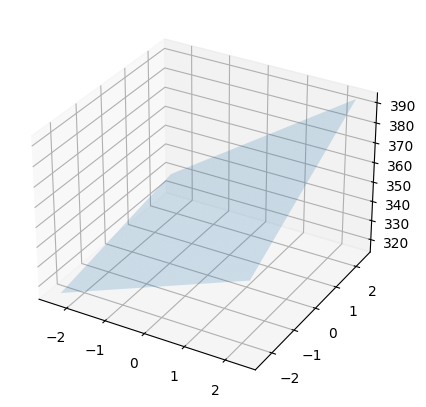

In [29]:
import matplotlib.pyplot as plt


fig = plt.figure(figsize=(5,5))
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, alpha = 0.2)

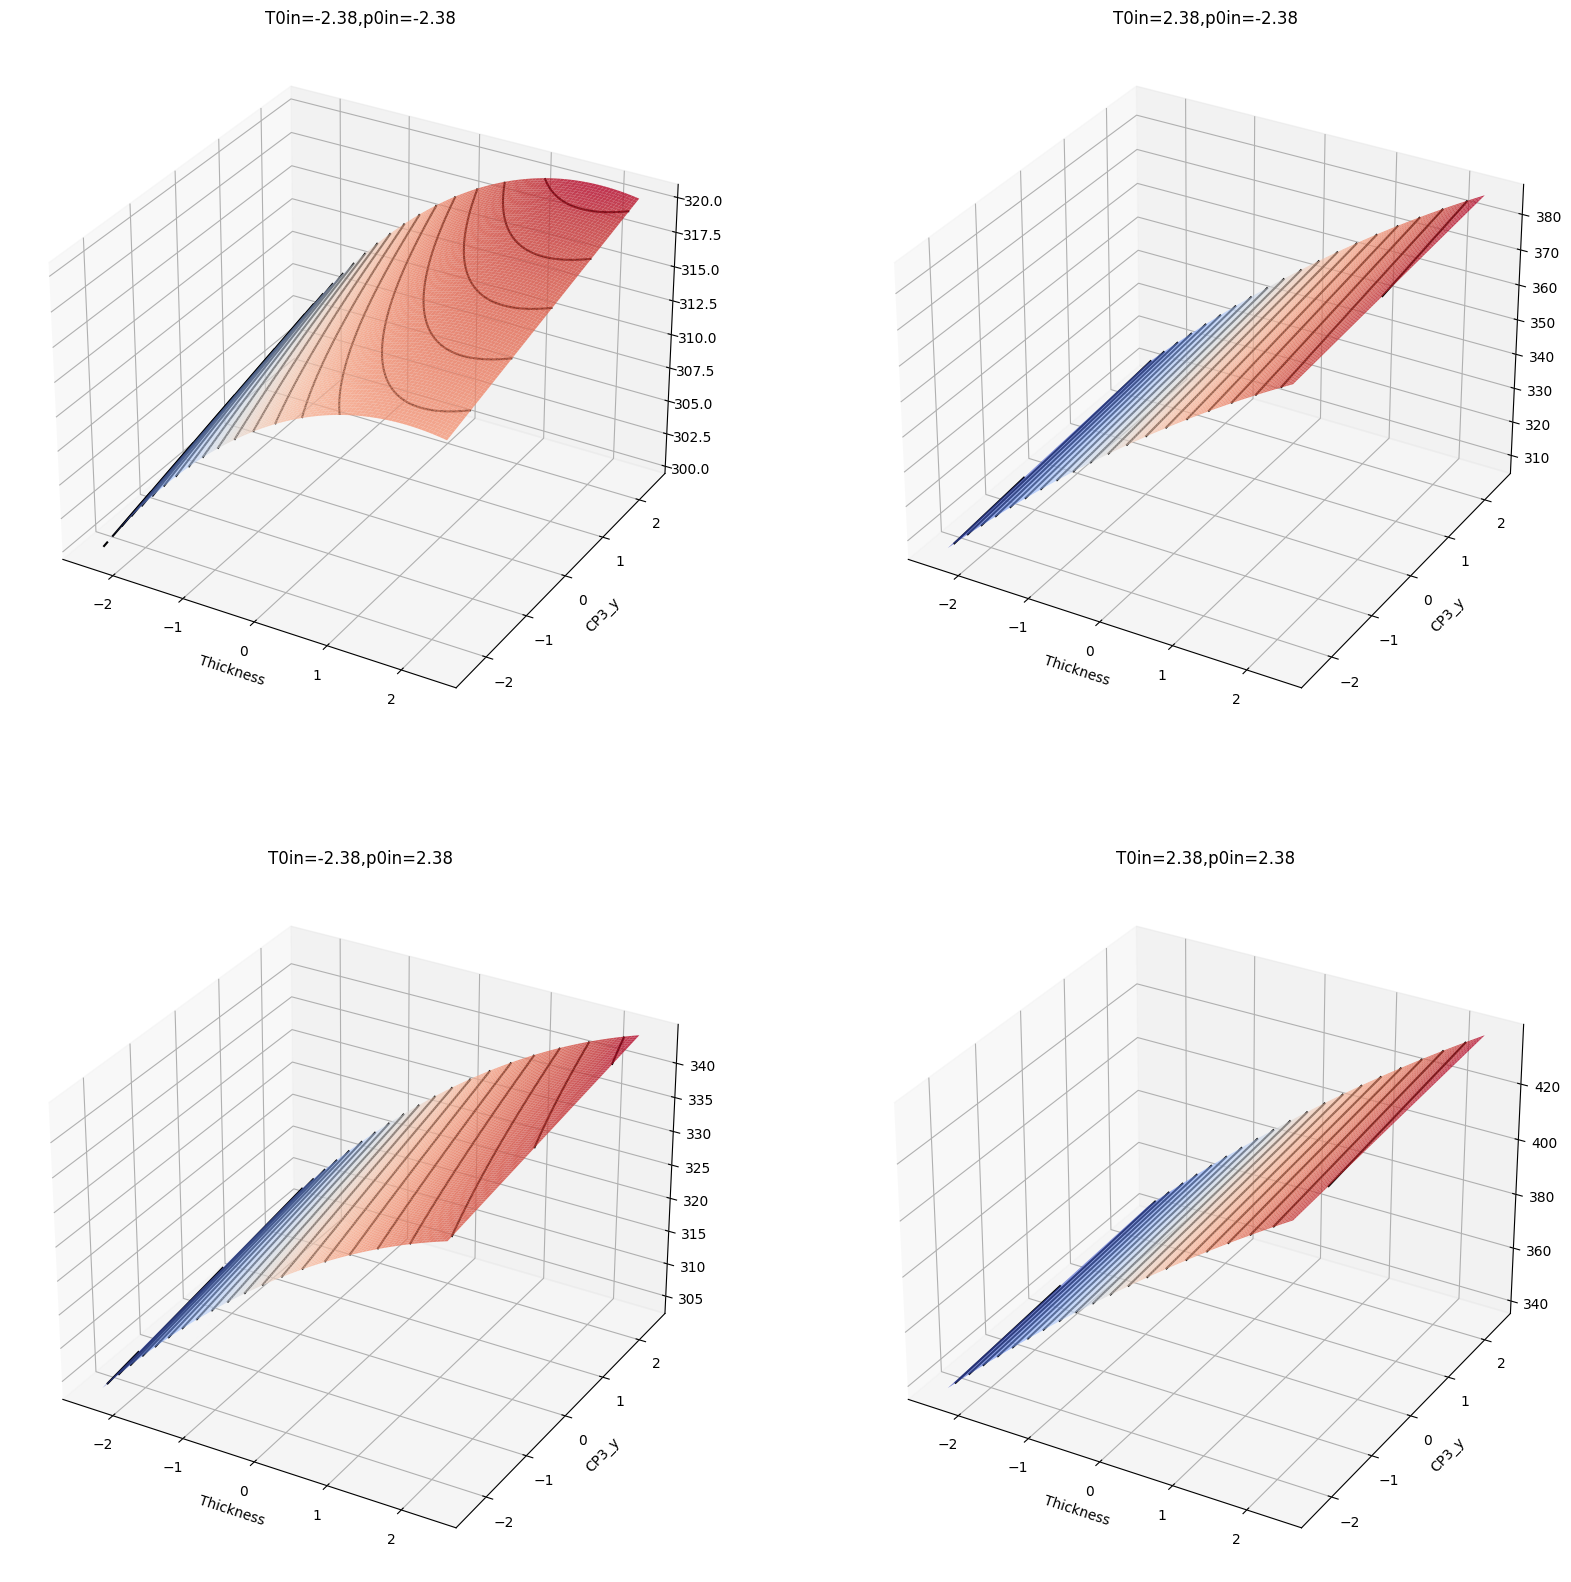

In [59]:
import matplotlib.pyplot as plt
from matplotlib import cm # for a scatter plot
from mpl_toolkits.mplot3d import Axes3D

levels = np.array([-2.37841423, 2.37841423])
levels_range = np.linspace(levels[0], levels[-1],100)
X,Y = np.meshgrid(levels_range, levels_range)

fig, ax = plt.subplots(levels.size, levels.size, figsize=(20,20), subplot_kw=dict(projection='3d'))

for i, lvl1 in enumerate(levels):
    for j, lvl2 in enumerate(levels):
        Z = sig_fm.model['Twall'].predict(
            pd.DataFrame({
                'Thickness': X.ravel(),
                'CP3_y': Y.ravel() ,
                'T0in': lvl2,#595.913043,
                'p0in': lvl1,#711558.623974,
                'outerTemperature': 2.37841423,
            })
        )

        Z = Z.values.reshape(X.shape)

        #fig = plt.figure(figsize=(5,5))
        #ax[i][j] = plt.axes()
        ax[i][j].plot_surface(
            X, Y, Z, rstride=1, cstride=1, alpha = 0.8,  cmap=cm.coolwarm,
            linewidth=1, antialiased=True)
        ax[i][j].contour(X, Y, Z, 20, colors="k", linestyles="solid")

        ax[i][j].set_xlabel('Thickness')
        ax[i][j].set_ylabel('CP3_y')
        ax[i][j].set_title(f'T0in={lvl2:.2f},p0in={lvl1:.2f}')
plt.show()

In [ ]:
hfdh = HDF5Handler(
    datapath='/home/ppiper/Dropbox/local/ihtc_nozzle/data/doe_lhs_multirun_N200/SU2_fluid_transposed.hdf5',
    datasets = ['Pressure', 'Temperature', 'Mach', 'Heat_Flux'],
)

FileNotFoundError: [Errno 2] Unable to synchronously open file (unable to open file: name = '/home/ppiper/Dropbox/local/ihtc_nozzle/data/doe_lhs_multirun_N200/SU2_fluid_transposed.hdf5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [ ]:
hfdh.datapath

: 

In [ ]:
import h5py

h5py.File()